## Liberaries


In [10]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression


### Read Dataset

In [13]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Preprocessing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
print('Shape :',df.shape)
print('='*100)
print('Columns :',df.columns)


Shape : (891, 12)
Columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
# drop unnecessary columns
df.drop(['PassengerId','Name','Ticket','Cabin'] , axis = 1 , inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
# Check missing values
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [19]:
# Treat missing value
df.Age.fillna(df.Age.mean(), inplace= True)

<ipython-input-19-7e785b4da82d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(), inplace= True)


In [20]:
df.Embarked.value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [21]:
df.fillna('S' , inplace= True)
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [22]:
# Check Duplication
df.duplicated().sum()

np.int64(111)

In [23]:
#traet duplication
df.drop_duplicates(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    object 
 3   Age       780 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  780 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


In [25]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

### Visualizatoin

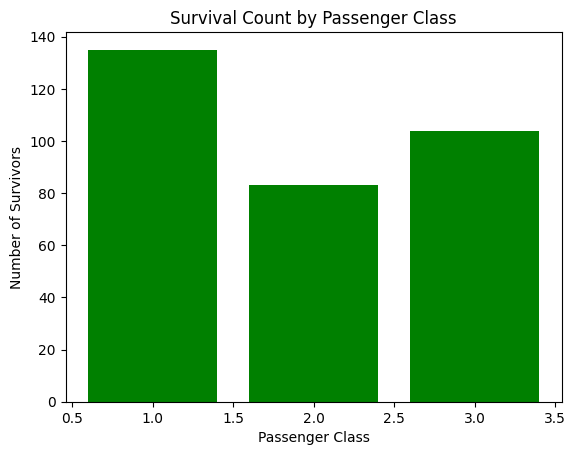

In [26]:
pclass = df.groupby('Pclass')['Survived'].sum()
plt.bar(pclass.index, pclass.values, color='green')
plt.xlabel("Passenger Class")
plt.ylabel("Number of Survivors")
plt.title("Survival Count by Passenger Class")
plt.show()

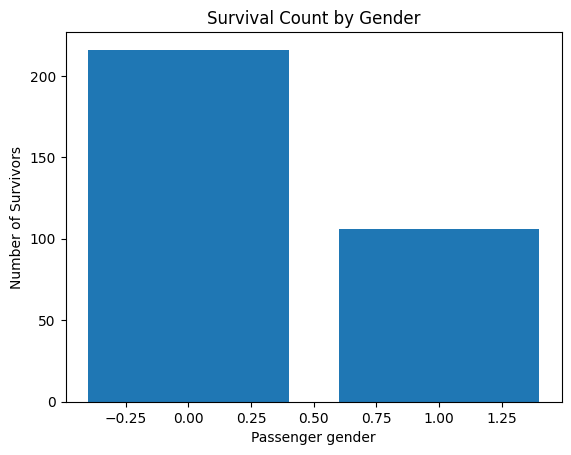

In [27]:
gender = df.groupby('Sex')['Survived'].sum()
plt.bar(gender.index , gender.values)
plt.xlabel("Passenger gender")
plt.ylabel("Number of Survivors")
plt.title("Survival Count by Gender")  #kol el regala mato fe el harb XD
plt.show()

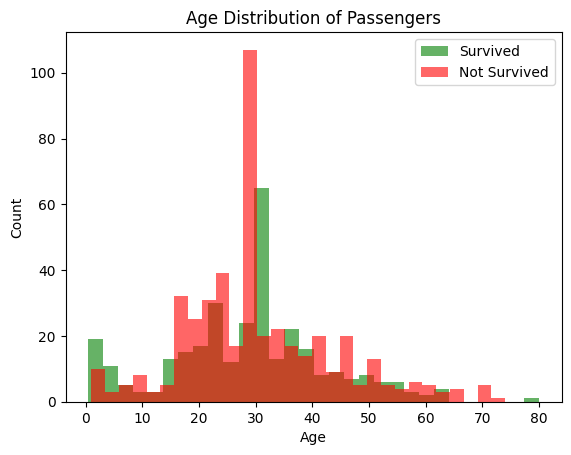

In [28]:
plt.hist(df[df["Survived"] == 1]["Age"], bins=30, alpha=0.6, color="green", label="Survived")
plt.hist(df[df["Survived"] == 0]["Age"], bins=30, alpha=0.6, color="red", label="Not Survived")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.legend()
plt.show()

### Data spliting

In [29]:
x = df.drop('Survived' , axis=1)
y = df['Survived']

In [30]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [31]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [32]:
x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state= 42)


In [33]:
print(x_train.shape)
print(y_train.shape)

(624, 7)
(624,)


In [34]:
print(x_test.shape)
print(y_test.shape)

(156, 7)
(156,)


### Logistic Regression
### Ridge Regularization

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost_logistic_ridge(X, y, w, b, lambda_):
    """
    Computes logistic regression cost with L2 regularization.

    Args:
        X: Data matrix (m examples, n features)
        y: Labels
        w: Weight vector
        b: Bias term
        lambda_: Regularization strength

    Returns:
        cost: Regularized cost value
    """
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    y_array = y.values if isinstance(y, pd.Series) else y
    m = X_array.shape[0]
    cost = 0.0

    for i in range(m):
        z_i = np.dot(X_array[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y_array[i]*np.log(f_wb_i + 1e-5) - (1 - y_array[i])*np.log(1 - f_wb_i + 1e-5)

    cost = cost / m
    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
    return cost + reg_cost

def compute_gradient_logistic_ridge(X, y, w, b, lambda_):
    """
    Computes gradients for logistic regression with L2 regularization.

    Returns:
        dj_db: Gradient with respect to bias
        dj_dw: Gradient with respect to weights
    """
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    y_array = y.values if isinstance(y, pd.Series) else y
    m, n = X_array.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X_array[i], w) + b)
        error = f_wb_i - y_array[i]
        dj_dw += error * X_array[i]
        dj_db += error

    dj_dw = dj_dw / m + (lambda_ / m) * w
    dj_db = dj_db / m
    return dj_db, dj_dw

def gradient_descent_logistic_ridge(X, y, w_in, b_in, alpha, num_iters, lambda_):
    """
    Performs gradient descent with L2 regularization.

    Returns:
        w: Final weights
        b: Final bias
        J_history: List of cost values per iteration
    """
    w = w_in.copy()
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic_ridge(X, y, w, b, lambda_)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            cost = compute_cost_logistic_ridge(X, y, w, b, lambda_)
            J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:.6f}")

    return w, b, J_history



### **Test**

In [46]:
w_init = np.zeros(x.shape[1])
b_init = 0
alpha = 0.001
num_iters = 10000
lambda_ = 1  # Regularization strength

w_final, b_final, J_hist = gradient_descent_logistic_ridge(x, y, w_init, b_init, alpha, num_iters, lambda_)
print(f"\nUpdated parameters: w: {w_final}, b: {b_final}")

Iteration    0: Cost 0.675902
Iteration 1000: Cost 0.614405
Iteration 2000: Cost 0.602955
Iteration 3000: Cost 0.594697
Iteration 4000: Cost 0.587749
Iteration 5000: Cost 0.581602
Iteration 6000: Cost 0.576077
Iteration 7000: Cost 0.571077
Iteration 8000: Cost 0.566537
Iteration 9000: Cost 0.562401

Updated parameters: w: [-0.15379794 -0.7524381  -0.00548607 -0.16443673  0.04775527  0.01305688
 -0.00533916], b: 0.16495081674615433


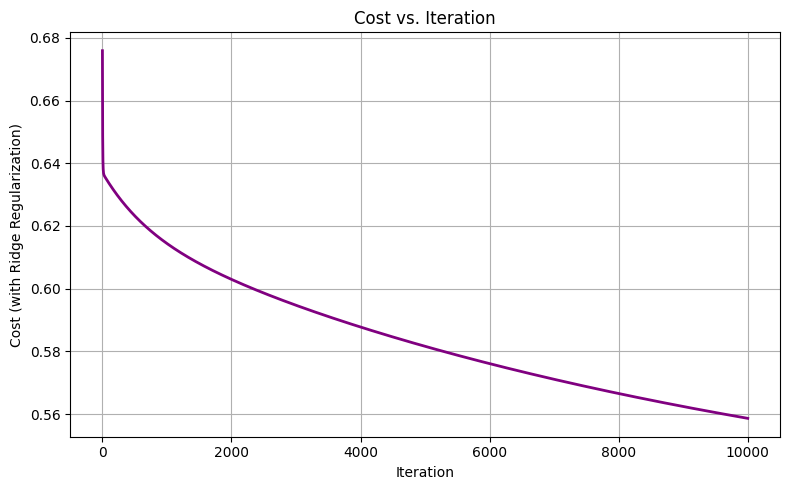

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(len(J_hist)), J_hist, color='purple', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost (with Ridge Regularization)")
plt.title("Cost vs. Iteration")
plt.grid(True)
plt.tight_layout()
plt.show()

### Logistic Regression
### Batch Gradient Descent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


In [ ]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
    X (pd.DataFrame): Data, m examples with n features
    y (pd.Series): target values
    w (ndarray (n,)): model parameters
    b (scalar): model parameter

    Returns:
    cost (scalar): cost
    """
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    y_array = y.values if isinstance(y, pd.Series) else y

    m = X_array.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X_array[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y_array[i]*np.log(f_wb_i) - (1-y_array[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for logistic regression

    Args:
    X (pd.DataFrame): Data, m examples with n features
    y (pd.Series): target values
    w (ndarray (n,)): model parameters
    b (scalar): model parameter

    Returns:
    dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
    dj_db (scalar): The gradient of the cost w.r.t. the parameter b.
    """
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    y_array = y.values if isinstance(y, pd.Series) else y

    m, n = X_array.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X_array[i], w) + b)
        err_i = f_wb_i - y_array[i]
        for j in range(n):
            dj_dw[j] += err_i * X_array[i, j]
        dj_db += err_i

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
    X (pd.DataFrame): Data, m examples with n features
    y (pd.Series): target values
    w_in (ndarray (n,)): Initial values of model parameters
    b_in (scalar): Initial values of model parameter
    alpha (float): Learning rate
    num_iters (int): number of iterations to run gradient descent

    Returns:
    w (ndarray (n,)): Updated values of parameters
    b (scalar): Updated value of parameter
    J_history (list): History of cost values
    """
    J_history = []
    w = w_in.copy()  # Avoid modifying the input array
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion
            J_history.append(compute_cost_logistic(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:.6f}")

    return w, b, J_history

### Test

In [ ]:
w_tmp = np.zeros(x_train.shape[1])  # Initialize weights with zeros matching number of features
b_tmp = 0
alph = 0.001
iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nUpdated parameters: w: {w_out}, b: {b_out}")

Iteration    0: Cost 0.678329
Iteration 1000: Cost 0.620994
Iteration 2000: Cost 0.608721
Iteration 3000: Cost 0.599837
Iteration 4000: Cost 0.592379
Iteration 5000: Cost 0.585815
Iteration 6000: Cost 0.579946
Iteration 7000: Cost 0.574661
Iteration 8000: Cost 0.569881
Iteration 9000: Cost 0.565543

Updated parameters: w: [-0.16224063 -0.7764355  -0.0019881  -0.15949295  0.09665959  0.01112938
 -0.02444038], b: 0.1568883583671202


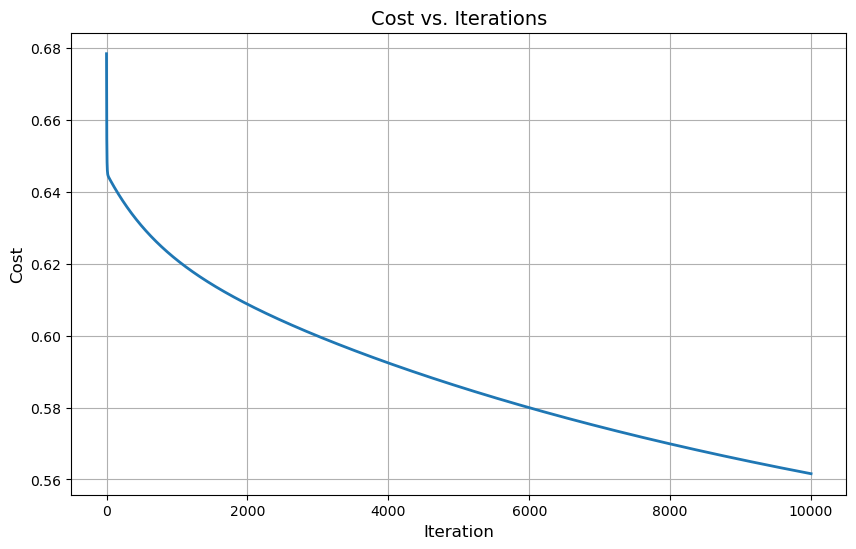

In [ ]:
def plot_cost_history(J_history):
    plt.figure(figsize=(10, 6))
    plt.plot(J_history, linewidth=2)
    plt.title("Cost vs. Iterations", fontsize=14)
    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("Cost", fontsize=12)
    plt.grid(True)
    plt.show()
plot_cost_history(_)

### Logistic Regression
### SGD Gradient Descent

In [ ]:
def stochastic_gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    # Copy weights and bias
    w = w_in.copy()
    b = b_in
    J_history = []  # To keep track of cost

    # Convert to arrays
    X_array = X.values if isinstance(X, pd.DataFrame) else X
    y_array = y.values if isinstance(y, pd.Series) else y
    m = X_array.shape[0]  # Number of samples

    for epoch in range(num_iters):
        # Shuffle data for each epoch
        indices = np.random.permutation(m)
        X_shuffled = X_array[indices]
        y_shuffled = y_array[indices]

        for i in range(m):  # Loop through each sample
            x_i = X_shuffled[i]
            y_i = y_shuffled[i]

            # Prediction and error
            z_i = np.dot(x_i, w) + b
            f_wb_i = sigmoid(z_i)
            err = f_wb_i - y_i

            # Gradients for weights and bias
            dj_dw = err * x_i
            dj_db = err

            # Update weights and bias
            w -= alpha * dj_dw
            b -= alpha * dj_db

        # Print cost every 1000 iterations
        if epoch % 1000 == 0:
            cost = compute_cost_logistic(X, y, w, b)
            J_history.append(cost)
            print(f"Iteration {epoch}: Cost {cost:.6f}")

    return w, b, J_history


### Modeling

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train , y_train)

c:\Users\MAZEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Test

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        91
           1       0.75      0.71      0.73        65

    accuracy                           0.78       156
   macro avg       0.78      0.77      0.77       156
weighted avg       0.78      0.78      0.78       156



In [ ]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

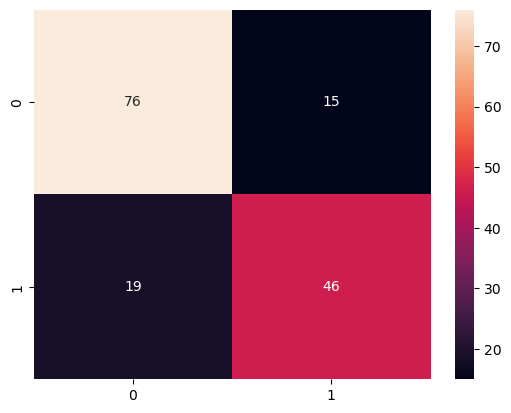

In [ ]:
sns.heatmap(cm , annot=True)